In [7]:
import unittest
import os
import io
from inverter_simulator.simulator import InverterSimulator
from aemo_to_tariff import spot_to_tariff
import json
from zoneinfo import ZoneInfo
import requests
import pandas as pd
from datetime import datetime, timedelta
from requests.models import PreparedRequest


In [ ]:

API_KEY = os.getenv('POWSTON_API_KEY')

powston_test_server = os.getenv("POWSTON_TEST_SERVER", 'https://dev.inverterintelligence.com')
header = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}
site_id = 90

url = f'{powston_test_server}/api/meter_data/{site_id}'
params = {
    "from_date": "2024-12-15",
    "to_date": "2024-12-19"}
req = PreparedRequest()
req.prepare_url(url, params)

response = requests.get(req.url, headers=header).json()

meter_data_df = pd.read_json(response, orient="records", convert_dates=['interval_time'])
meter_data_df['interval_time'] = pd.to_datetime(meter_data_df['interval_time']).dt.tz_convert(ZoneInfo("Australia/Brisbane"))
meter_data_df.set_index('interval_time', inplace=True)
meter_data_df.sort_index(inplace=True)
# remove duplcates and keep the last value
meter_data_df = meter_data_df[~meter_data_df.index.duplicated(keep='last')]
meter_data_df

/tmp/ipykernel_3132987/69614328.py:16: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  meter_data_df = pd.read_json(response, orient="records", convert_dates=['interval_time'])


,energy_import,energy_export,battery_w,rrp,hhf_rrp,forecasts,solar_power,house_power,billed_costs,billed_earnings,buy_price,sell_price
interval_time,,,,,,,,,,,,
2024-11-23 23:00:00+10:00,0.001,0.001,0.00,167.77,167.77,"[147.82, 159.41, 165.57, 160.83, 151.77, 127.5...",0,0,0.556930,0.017598,20.656140,16.777
2024-11-23 23:05:00+10:00,0.268,0.259,0.00,167.61,167.61,"[147.82, 159.41, 165.57, 160.83, 151.77, 127.5...",0,0,7.026840,4.553558,20.638670,16.761
2024-11-23 23:10:00+10:00,0.311,0.313,0.00,220.87,220.87,"[163.81, 148.0, 165.33, 161.99, 150.55, 125.9,...",0,0,9.980011,7.251574,26.454235,22.087
2024-11-23 23:15:00+10:00,0.145,0.157,0.00,202.36,202.36,"[163.81, 148.0, 165.33, 161.99, 150.55, 125.9,...",0,0,4.627700,3.332541,24.433091,20.236
2024-11-23 23:20:00+10:00,0.001,0.001,0.00,165.16,165.16,"[163.81, 148.0, 165.33, 161.99, 150.55, 125.9,...",0,0,0.556629,0.017324,20.371149,16.516
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-27 22:35:00+10:00,0.000,0.000,0.86,241.79,241.79,"[201.87, 188.76, 169.16, 134.77, 161.07, 175.3...",0,0,0.532680,0.000000,28.738531,24.179
2024-11-27 22:40:00+10:00,0.000,0.001,9.96,187.08,187.08,"[198.3, 170.8, 168.91, 141.69, 164.37, 176.86,...",0,0,0.532680,0.019624,22.764638,18.708
2024-11-27 22:45:00+10:00,0.001,0.000,1.12,184.33,184.33,"[198.3, 170.8, 168.91, 141.69, 164.37, 176.86,...",0,0,0.558841,0.000000,22.464360,18.433


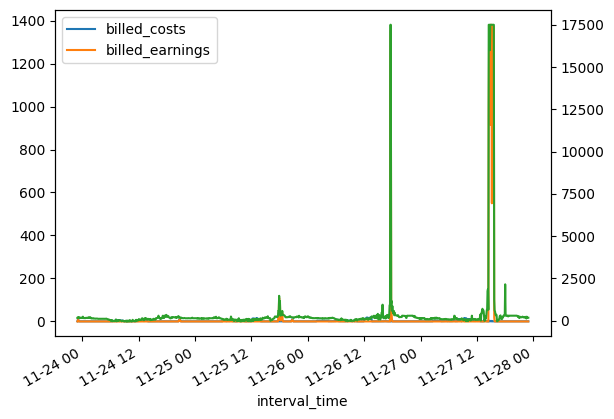

In [21]:
plt = meter_data_df[['billed_costs', 'billed_earnings']].plot()
meter_data_df['rrp'].plot(secondary_y=True, ax=plt)
                        spot_to_tariff=spot_to_tariff, tariff='EA116', network='ausgrid',
                        charge_rate=charge_rate, max_ppv_power=max_ppv_power)
sim_bill, ret_df = sim.run_simulation()

print('User code', round(sim_bill/100, 2), 'v auto only', round(auto_bill/100, 2))
plot()